In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sbn
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import to_hex 
import scipy.cluster.hierarchy as sch

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

In [2]:
root = '/Users/grantongo/Desktop/nature methods/figures'

volcano_significant = pd.read_csv(f'{root}/data/pbmc/pbmc_significant_responses_2025.01.22.csv')
sensors = pd.read_csv(f'{root}/data/pbmc/pbmc_sensors.csv', header=None)[0].tolist()

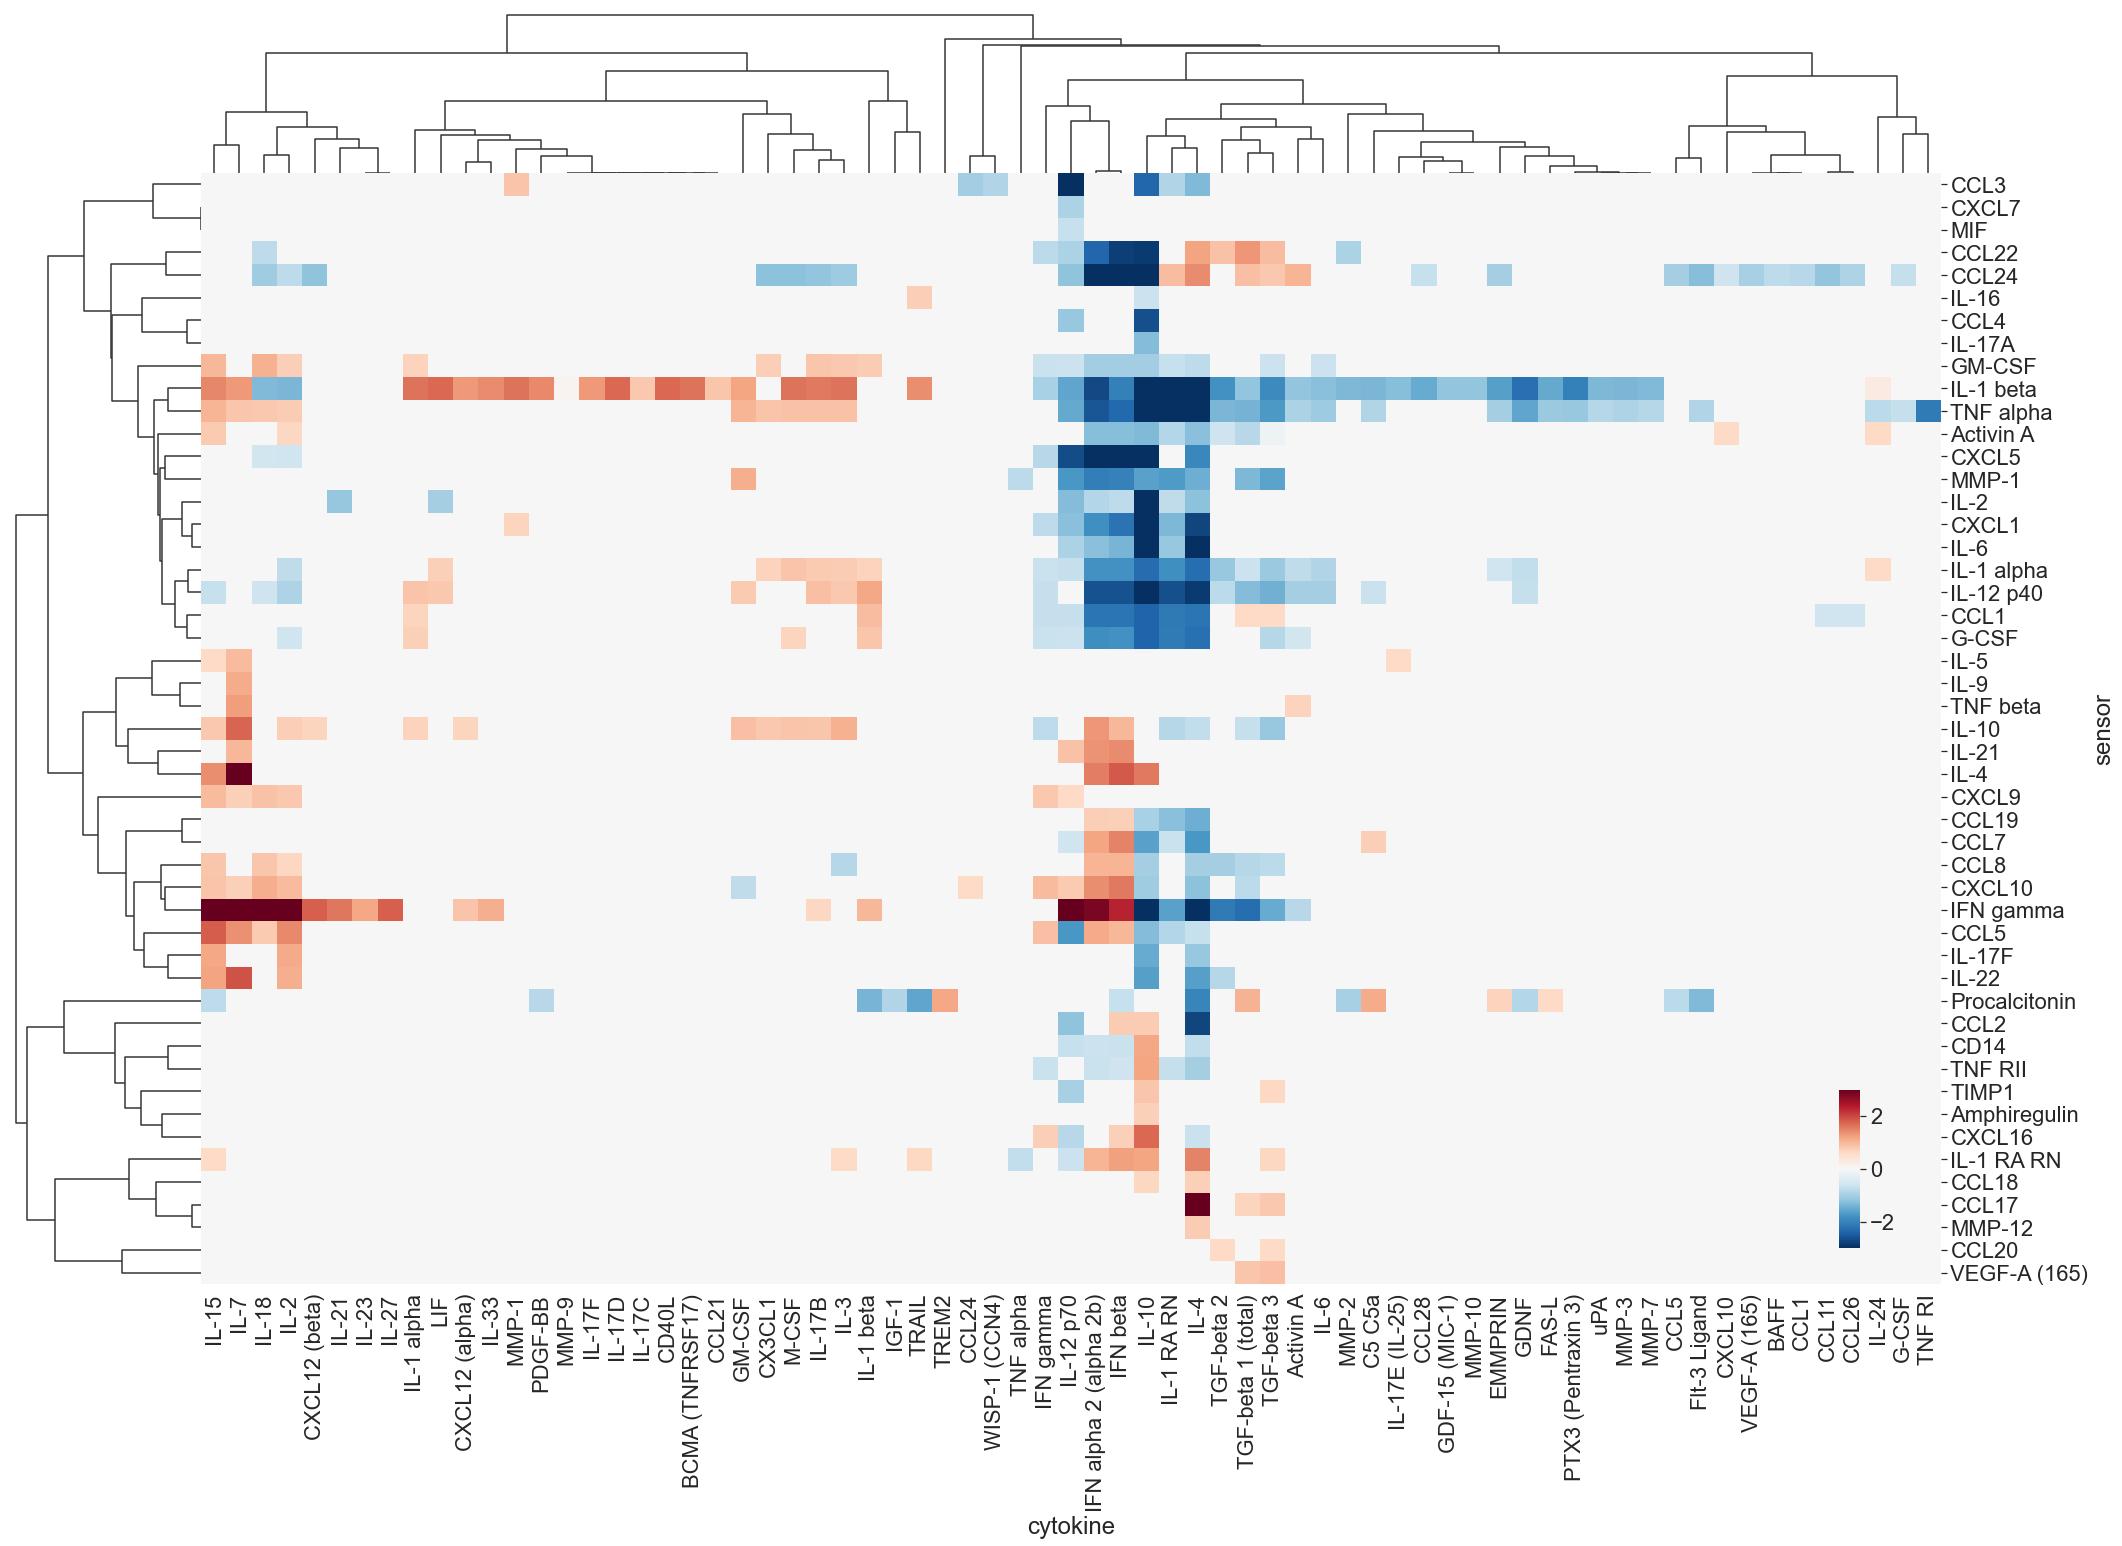

In [3]:
# heatmaps of significant pairs: foldchange (mean) 

stim = ['control','LPS','PolyIC','ConA','PMAi']
df_significant = volcano_significant.loc[volcano_significant.stimulus.isin(stim), ['cytokine','sensor','log2fc']]

df_pivot = pd.pivot_table(df_significant, values='log2fc',index='sensor', columns=['cytokine'], aggfunc='median')
df_pivot = df_pivot.fillna(0)

# color map for positive and negative foldchange
sbn.set_style('white')
sbn.set(font_scale=2)
colormap = cm.RdBu_r
normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=-3, vmax=3)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df_pivot)

fig = sbn.clustermap(data=df_pivot, 
                     cmap=colormap, 
                     norm=normalize,
                     xticklabels=True, 
                     yticklabels=True,
                     figsize=(30,22),
                     metric='cosine',
                     dendrogram_ratio=(0.1,0.13),
                     tree_kws={"linewidths": 1.5}, 
                     cbar_pos=(0.86, 0.2, 0.01, 0.1), 
                     rasterized=True,
                    )

ax = fig.ax_heatmap

x_tick_labels = [label.get_text() for label in fig.ax_heatmap.get_xticklabels()] 

fig.savefig(f'{root}/figure 5/svg_figure.5.a_foldchange.heatmap_{formatted_date}.svg')

In [44]:
# group perturbants by induction of cytokines

label1 = 'IFN gamma inducers' 
group1 = ['IL-15',
           'IL-7',
           'IL-18',
           'IL-2',
           'CXCL12 (beta)',
           'IL-21',
           'IL-23',
           'IL-27']

label2 = 'CCL24 inhibitors' 
group2 = ['CCL5',
         'Flt-3 Ligand',
         'CXCL10',
         'VEGF-A (165)',
         'BAFF',
         'CCL1',
         'CCL11',
         'CCL26',
         'IL-24',
         'G-CSF',
         'TNF RI']

label3 = 'TNF alpha, IL-1 alpha/beta inducers'    
group3 = ['GM-CSF',
         'CX3CL1',
         'M-CSF',
         'IL-17B',
         'IL-3']

label4 = 'IL-1 beta inducers'
group4 = ['IL-1 alpha',
         'LIF',
         'CXCL12 (alpha)',
         'IL-33',
         'MMP-1',
         'PDGF-BB',
         'MMP-9',
         'IL-17F',
         'IL-17D',
         'IL-17C',
         'CD40L',
         'BCMA (TNFRSF17)',
         'CCL21',
         'TRAIL',
         'IL-1 beta',
         'IGF-1',]

label5 = 'Th1/Th2'
group5 = ['CCL24',
         'WISP-1 (CCN4)',
         'TNF alpha',
         'IFN gamma',
         'IL-12 p70',
         'IFN alpha 2 (alpha 2b)',
         'IFN beta',
         'IL-10',
         'IL-1 RA RN',
         'IL-4',
         'TGF-beta 2',
         'TGF-beta 1 (total)',
         'TGF-beta 3',
         'Activin A',
         'IL-6',]

label6 = 'IL-1 beta inhibitors'
group6 = ['IL-17E (IL-25)',
           'CCL28',
           'GDF-15 (MIC-1)',
           'MMP-10',
           'MMP-2']

label7 = 'TNF alpha, IL-1 beta inhibitors'
group7 = ['TREM2',
       'C5 C5a',
       'EMMPRIN',
       'GDNF',
       'FAS-L',
       'PTX3 (Pentraxin 3)',
       'uPA',
       'MMP-3',
       'MMP-7']

mapped_dict = {}
for keys, value in zip([group1, group2, group3, group4, group5, group6, group7], 
                       [label1, label2, label3, label4, label5, label6, label7]):
    mapped_dict.update({key: value for key in keys})
    
    
import csv
with open('mapped_dict.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Key', 'Value']) 
    for key, value in mapped_dict.items():
        writer.writerow([key, value])

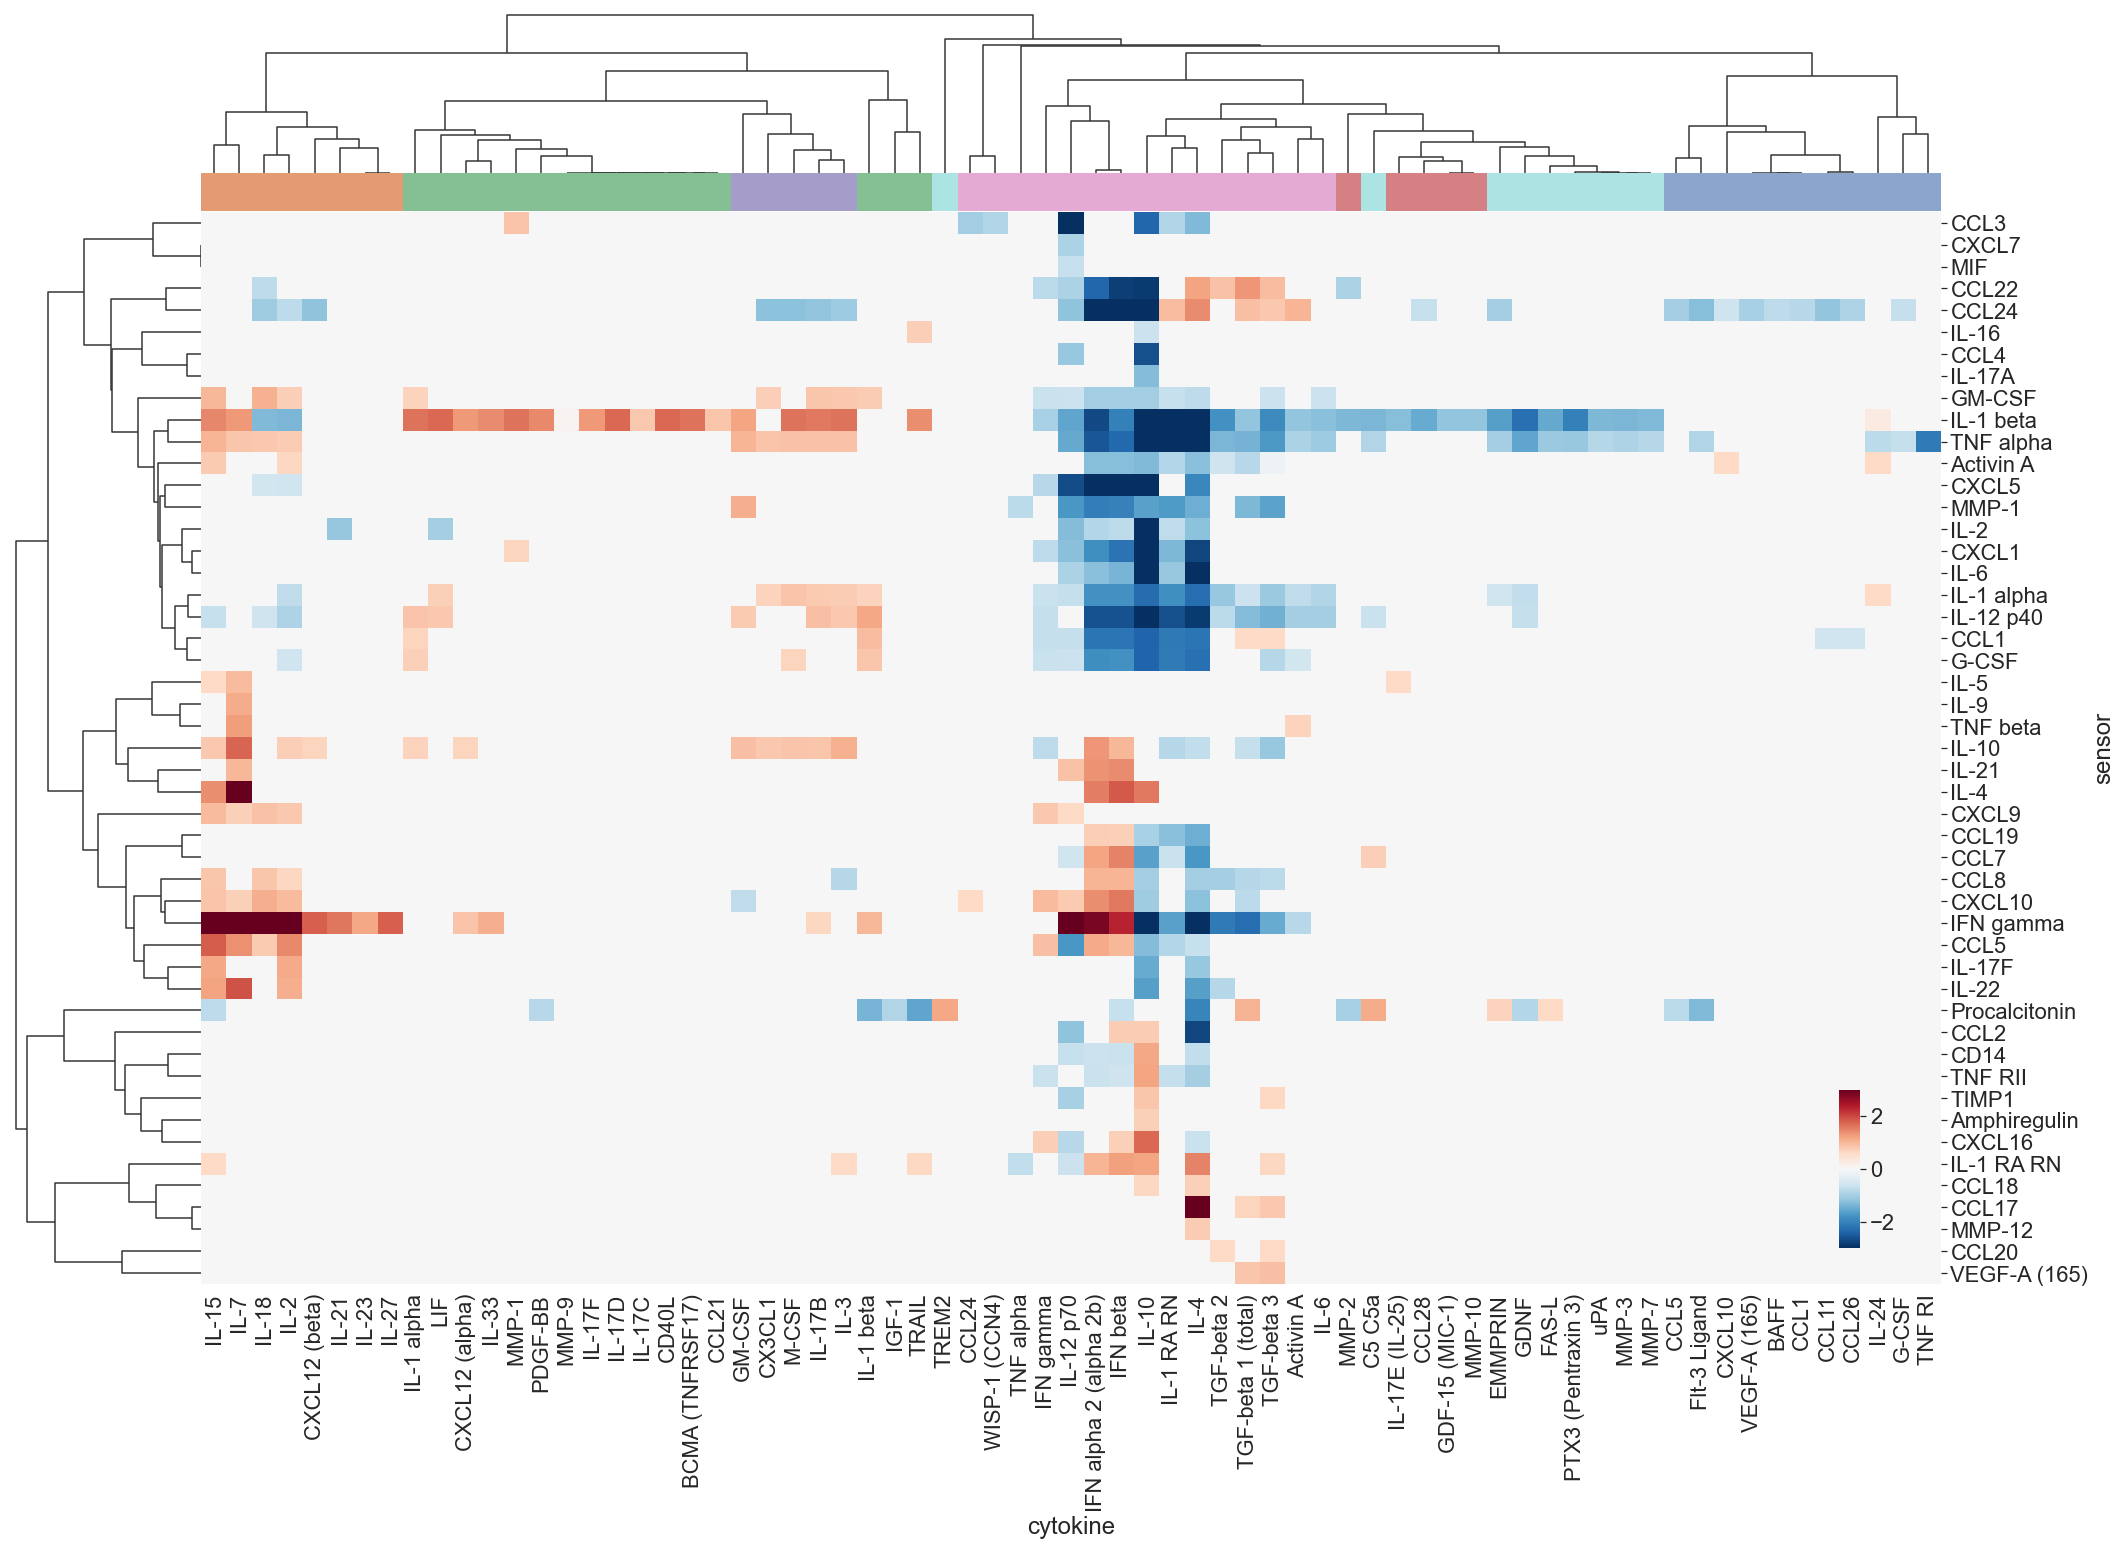

In [40]:
group_colors = {
    'IFN gamma inducers': '#e49b74ff',
    'CCL24 inhibitors': '#8ba5cdff',
    'TNF alpha, IL-1 alpha/beta inducers': '#a69cc9ff',
    'IL-1 beta inducers':'#84c093ff',
    'Th1/Th2':'#e4aad3ff',
    'IL-1 beta inhibitors':'#d58183ff',
    'TNF alpha, IL-1 beta inhibitors':'#ace3e3ff'
}

col_colors = df_pivot.columns.map(lambda col: group_colors[mapped_dict[col]])

fig = sbn.clustermap(data=df_pivot, 
                     cmap=colormap, 
                     norm=normalize,
                     col_colors=col_colors,
                     xticklabels=True, 
                     yticklabels=True,
                     figsize=(30,22),
                     metric='cosine',
                     dendrogram_ratio=(0.1,0.13),
                     tree_kws={"linewidths": 1.5}, 
                     cbar_pos=(0.86, 0.2, 0.01, 0.1), 
                     rasterized=True,
                    )

ax = fig.ax_heatmap

x_tick_labels = [label.get_text() for label in fig.ax_heatmap.get_xticklabels()] 

fig.savefig(f'{root}/figure 5/svg_figure.5.a_foldchange.heatmap_{formatted_date}.svg')

/var/folders/1d/73pxx39550zdk8hqlvvzxbl40000gn/T/ipykernel_56750/4170850344.py:95: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_fc = sc.AnnData(dfObs)


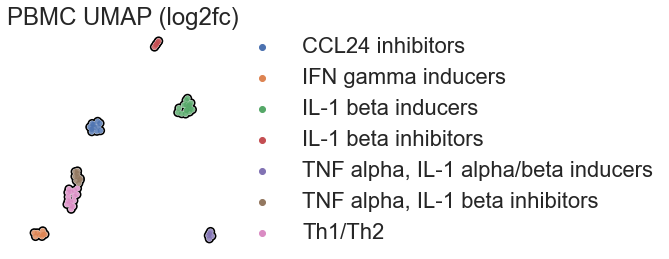

In [35]:
# UMAP of log2fc

stims = ['PMAi','LPS','ConA','PolyIC','control']
variables = ['cytokine']

# fold change dataframe
df_fc = pd.pivot_table(volcano_significant[volcano_significant.stimulus.isin(stims)], values='log2fc', columns=['sensor'], index=variables, aggfunc=np.median)
df_fc = df_fc.reset_index()
df_fc = df_fc.fillna(0)

# group perturbagens by cytokine induction
df_fc['group'] = df_fc['cytokine'].map(mapped_dict) 

# datapoint labels
df_fc['identifier'] = df_fc[variables].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_fc.set_index('identifier', inplace=True)

# annotated data structure 
idx_cols = [x for x in df_fc.columns if x not in sensors]
dfObs = df_fc[[x for x in df_fc.columns if x in sensors]]
adata_fc = sc.AnnData(dfObs)
adata_fc.obs[idx_cols] = df_fc[idx_cols].astype('category')

# umap clustering
sc.tl.pca(adata_fc, svd_solver='arpack')
sc.pp.neighbors(adata_fc, n_neighbors=4, n_pcs=None, metric='cosine')
sc.tl.umap(adata_fc, spread=0.9, min_dist=0.8, n_components=2)

fig, ax = plt.subplots(1,1, figsize=(3.5,4))
ax = sc.pl.umap(adata_fc, 
                color='group', 
                frameon=False, 
                add_outline=True, 
                groups=None, 
                title='PBMC UMAP (log2fc)', 
                alpha=0.8, 
                size=120,
                legend_fontoutline=2, 
                projection = '2d', 
                colorbar_loc=None, 
                show=False,
                ax=ax)

fig.savefig(f'{root}/figure 5/svg_figure.5.b_foldchange.umap_{formatted_date}.svg')

In [72]:
# heatmaps of foldchange per stim condition 

for stim in ['control','LPS','PolyIC','ConA','PMAi']:
    
    df_significant = volcano_significant.loc[volcano_significant.stimulus == stim, ['cytokine','sensor','log2fc']]

    df_pivot = pd.pivot_table(df_significant, values='log2fc',index='sensor', columns=['cytokine'], aggfunc='median')
    df_pivot = df_pivot.fillna(0)

    # color map for positive and negative foldchange
    sbn.set_style('white')
    sbn.set(font_scale=1)
    colormap = cm.RdBu_r
    normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=-3, vmax=3)
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(df_pivot)

    fig = sbn.clustermap(data=df_pivot, 
                         cmap=colormap, 
                         norm=normalize,
                         xticklabels=True, 
                         yticklabels=True,
                         #figsize=(30,22),
                         #square=True,
                         metric='cosine',
                         dendrogram_ratio=(0.1,0.13),
                         tree_kws={"linewidths": 0.5}, 
                         cbar_pos=(0.01, 0.9, 0.01, 0.1), 
                         rasterized=True,
                        )

    ax = fig.ax_heatmap
    fig.savefig(f'{root}/figure si.5 (foldchange heatmaps)/svg_figure.si.5.foldchange.heatmap_{stim}_{formatted_date}.svg')
    fig.savefig(f'{root}/figure si.5 (foldchange heatmaps)/png_figure.si.5.foldchange.heatmap_{stim}_{formatted_date}.png')
    
    plt.close()